In [1]:
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
from typing import List, Dict, Union, Any, Tuple, Callable, Optional, Set


def plot_histogram(data):
    fig = px.histogram(data, nbins=1000)
    fig.update_layout(bargap=0.0)
    fig.show()
    plt.plot(np.sort(data), np.linspace(0, 1, len(data), endpoint=False))

100%|██████████| 10/10 [00:01<00:00,  5.58it/s]


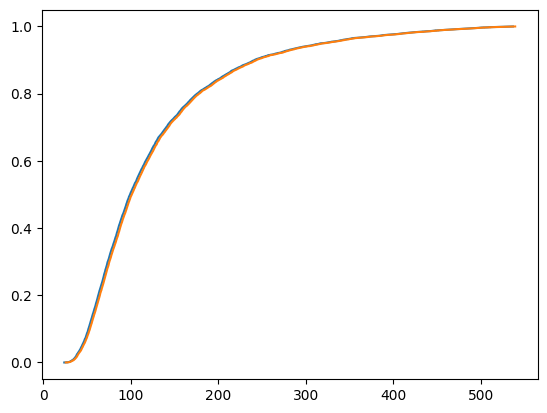

In [2]:
from models.anomaly_distance import RnConformanceScore
from tqdm import tqdm

def general_d_simu(N_simu:int = 100000,
                   d:int = 30,                      #dimension of gaussian vector
                   n:Optional[int] = None,          #corpus size
                   compute_batch_size:int = 1000,  #batch size for computing mahalanobis distance
                ):
    n = d if n is None else n
    confs = []
    mahals = []
    for i in tqdm(range(N_simu//compute_batch_size)):
        corpus = np.random.normal(0, 1, size=(n, d))
        conformance_score = RnConformanceScore(corpus, SVD_threshold=0.0000001)
        Z = np.random.normal(0,1, size=(compute_batch_size, d))
        confs_, mahals_ = conformance_score(Z, method="both")
        confs.extend(confs_)
        mahals.extend(mahals_)
    confs = np.array(confs)
    mahals = np.array(mahals)

    #plot
    confs = confs[confs<np.quantile(confs, 0.95)]
    mahals = mahals[mahals<np.quantile(mahals, 0.95)]
    plot_histogram(confs)
    plot_histogram(mahals)

N_simu=10000
d= 100
n = d
general_d_simu(N_simu, d, n)